In [4]:
import pandas as pd
import numpy as np
from cryptocompare import get_historical_price_day
import time
from datetime import datetime

# Fetch historical Bitcoin price data
def fetch_bitcoin_price(start_date, end_date):
    end_date_timestamp = int(time.mktime(datetime.strptime(end_date, "%Y-%m-%d").timetuple()))
    data = get_historical_price_day('BTC', 'USD', toTs=end_date_timestamp, limit=2000)
    df = pd.DataFrame(data)
    df['timestamp'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('timestamp', inplace=True)
    return df

# Specify the date range for historical data
start_date = '2022-01-01'
end_date = '2022-07-31'
bitcoin_df = fetch_bitcoin_price(start_date, end_date)
print(bitcoin_df.head())

                  time     high      low     open  volumefrom      volumeto  \
timestamp                                                                     
2017-02-06  1486339200  1030.60  1010.83  1016.11    32019.82  3.282835e+07   
2017-02-07  1486425600  1054.10  1019.87  1024.67    39553.25  4.131835e+07   
2017-02-08  1486512000  1069.23  1020.33  1049.56    65145.12  6.833632e+07   
2017-02-09  1486598400  1073.03   924.65  1055.49   146746.26  1.458393e+08   
2017-02-10  1486684800  1005.60   947.02   978.96    62132.99  6.063911e+07   

              close conversionType conversionSymbol  
timestamp                                            
2017-02-06  1024.67         direct                   
2017-02-07  1049.56         direct                   
2017-02-08  1055.49         direct                   
2017-02-09   978.96         direct                   
2017-02-10   997.61         direct                   


In [5]:
bitcoin_df = bitcoin_df[['close']]

In [6]:
from sklearn.preprocessing import StandardScaler

# Calculate daily returns as a feature
bitcoin_df['daily_return'] = bitcoin_df['close'].pct_change()

# Drop NaN values
bitcoin_df.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
bitcoin_df_scaled = scaler.fit_transform(bitcoin_df)

In [9]:
from sklearn.cluster import KMeans

# Determine the number of clusters.
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
bitcoin_df['cluster'] = kmeans.fit_predict(bitcoin_df_scaled)

# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 7.95490034e+03  2.34320650e-03]
 [ 1.10410485e+04  6.95678343e-02]
 [ 4.55255115e+04  1.38552972e-03]
 [ 1.14501785e+04 -6.56338970e-02]]


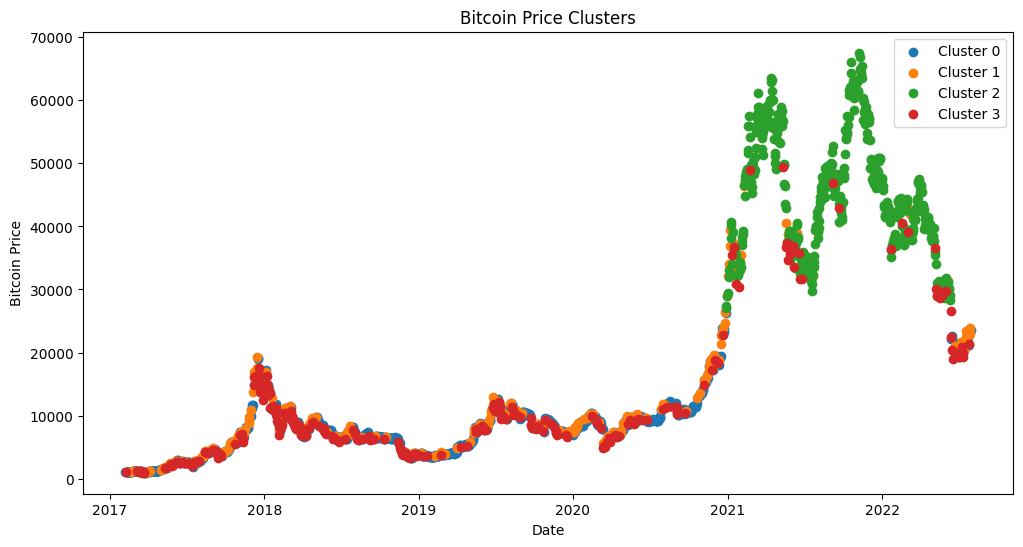

In [10]:
import matplotlib.pyplot as plt

# Plot Bitcoin price data with clusters
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    plt.scatter(bitcoin_df.index[bitcoin_df['cluster'] == cluster],
                bitcoin_df['close'][bitcoin_df['cluster'] == cluster],
                label=f'Cluster {cluster}')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Clusters')
plt.legend()
plt.show()

In [11]:
cluster_means = bitcoin_df.groupby('cluster').mean()

In [12]:
print("\nCluster Profiling:")
print(cluster_means)


Cluster Profiling:
                close  daily_return
cluster                            
0         7954.900341      0.002343
1        11041.048458      0.069568
2        45525.511458      0.001386
3        11450.178542     -0.065634


**Cluster of Stable Prices (Cluster 0):**

The cluster with a relatively low average "close" price (around 7954.90) and a small positive average "daily_return" (0.002343) could represent periods of relatively stable prices.
Investors and traders might find this cluster interesting for short-term trading, as the small positive daily return indicates potential opportunities for incremental gains over time.

**Cluster of Significant Price Increases (Cluster 1):**

The cluster with an average "close" price of about 11041.05 and a high average "daily_return" of 0.069568 could correspond to periods of rapid price growth and bull markets.
This cluster might represent favorable market conditions for long-term investors, as the substantial positive daily return indicates substantial price increases.

**Cluster of High-Value Prices (Cluster 2):**

The cluster with an average "close" price of approximately 45525.51 and a small positive average "daily_return" (0.001386) could reflect periods of high-value prices with gradual upward movements.
Investors and traders might find this cluster appealing for long-term investments, as the high average price suggests a relatively premium market segment.

**Cluster of Price Declines (Cluster 3):**

The cluster with an average "close" price of around 11450.18 and a significantly negative average "daily_return" (-0.065634) could correspond to bearish periods with notable price declines.
This cluster might be of interest to short-term traders who specialize in profiting from price declines, as the negative daily return suggests potential opportunities for short-selling strategies.

**Market Cycle Insights:**

The different clusters could potentially represent different phases of market cycles, such as bull markets, bear markets, consolidation phases, and transitional periods.
Analyzing how Bitcoin prices transition between these clusters over time could provide insights into the dynamics of market cycles.
Portfolio Diversification:

Investors could use the cluster information to diversify their portfolios across different market segments based on price behavior and trends.
For instance, they might allocate investments to clusters with stable prices for risk management and to clusters with high-value prices for potential gains.

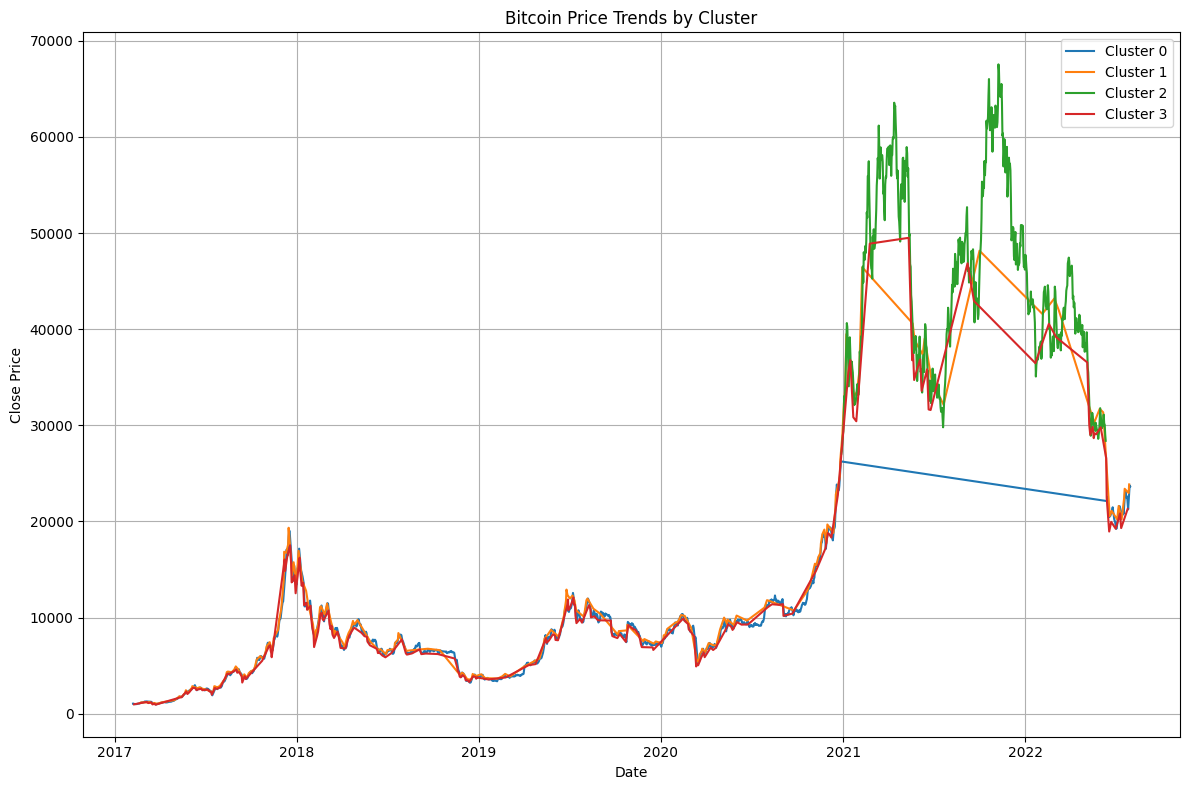

In [19]:
plt.figure(figsize=(12, 8))

for cluster_id in range(n_clusters):  # Replace n_clusters with the actual number of clusters
    cluster_data = bitcoin_df[bitcoin_df['cluster'] == cluster_id]
    plt.plot(cluster_data.index, cluster_data['close'], label=f'Cluster {cluster_id}')

plt.title('Bitcoin Price Trends by Cluster')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
